## Statistiche GAM da csv

Le statistiche partono dal file csv creato nel notebook GAM_stat02 e riporta le webapp accedute nel corso delle diverse sessioni GAM. Dal momento che per una stessa sessione possono essere accedute diverse webapp, il numero di webapp è maggione del numero di sessioni

In [145]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.0, style="whitegrid")

Per poter gestire il DataFrame come Time-series è necessario importarlo dichiarando che colonna di tipo data utilizzare come indice. Eventualmente sarebbe possibile passare anche una stringa di formato per il parse della data in imput.<br>In questo caso non è necessaria in quanto la colonna è già nel formato di default

In [146]:
file_path = os.path.join("export_stat_gam.csv")
df_webapp = pd.read_csv(file_path,
                        # Make sure the dates import in datetime format
                        parse_dates=['DATA'],
                        # Set DATE as the index so you can subset data by time period
                        index_col=['DATA'])
# Mask no data values so they are not plotted / used in analysis
#na_values=['999.99']
df_webapp.head()

,GAM_ID,DOMAIN,USERID,BEGIN_USER,WEBAPP
DATA,,,,,
2020-07-01 03:33:49,553799,EXT,W141088,W1,/cgapps3/wfciclopassivo
2020-07-01 06:08:46,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa
2020-07-01 09:16:34,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa
2020-07-01 10:13:46,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa
2020-07-01 10:46:31,553802,CGLOBAL,AXC0549,AX,/cgapps3/ContiAttesa


In [147]:
df_webapp.index

DatetimeIndex(['2020-07-01 03:33:49', '2020-07-01 06:08:46',
               '2020-07-01 09:16:34', '2020-07-01 10:13:46',
               '2020-07-01 10:46:31', '2020-07-01 11:49:45',
               '2020-07-01 05:20:28', '2020-07-01 05:26:58',
               '2020-07-01 05:38:21', '2020-07-01 05:42:55',
               ...
               '2020-12-20 20:32:27', '2020-12-20 20:37:43',
               '2020-12-20 21:04:53', '2020-12-20 20:43:00',
               '2020-12-20 20:48:16', '2020-12-20 20:53:32',
               '2020-12-20 20:58:49', '2020-12-20 22:12:02',
               '2020-12-20 22:35:44', '2020-12-20 22:50:08'],
              dtype='datetime64[ns]', name='DATA', length=450227, freq=None)

In [148]:
webapp_dett = df_webapp['WEBAPP']
webapp_dett

DATA
2020-07-01 03:33:49      /cgapps3/wfciclopassivo
2020-07-01 06:08:46         /cgapps3/ContiAttesa
2020-07-01 09:16:34         /cgapps3/ContiAttesa
2020-07-01 10:13:46         /cgapps3/ContiAttesa
2020-07-01 10:46:31         /cgapps3/ContiAttesa
                                 ...            
2020-12-20 20:53:32         /cgapps3/moduliAdobe
2020-12-20 20:58:49         /cgapps3/moduliAdobe
2020-12-20 22:12:02    /cgapps3/transfer-account
2020-12-20 22:35:44           /cgapps2/archCflow
2020-12-20 22:50:08          /cgapps3/fattureb2b
Name: WEBAPP, Length: 450227, dtype: object

Estraggo il linechart e il Bar Chart relativo al numero di webapp accedute per ogni ora.

In [149]:
webapp_series_by_h = webapp_dett.index.hour.value_counts().sort_index()
webapp_series_by_h

0        19
1        33
2        44
3       156
4       380
5      2632
6     23715
7     47464
8     57945
9     55565
10    55251
11    39633
12    35527
13    46074
14    44047
15    24581
16     9563
17     3803
18     1485
19      949
20      919
21      249
22      122
23       71
Name: DATA, dtype: int64

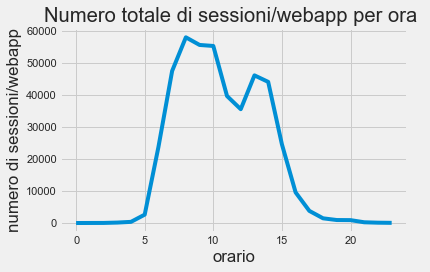

In [150]:
plt.style.use('fivethirtyeight')

hours_x = webapp_series_by_h.index
webapp_count_y = webapp_series_by_h.values
plt.plot(hours_x, webapp_count_y)

plt.title('Numero totale di sessioni/webapp per ora ')
plt.xlabel('orario')
plt.ylabel('numero di sessioni/webapp')
plt.grid(True)
plt.tight_layout()
plt.show()

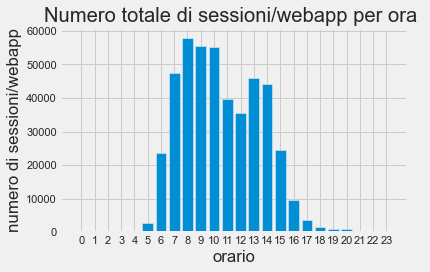

In [153]:
plt.bar(hours_x, webapp_count_y)

plt.xticks(ticks=hours_x, labels=hours_x)
plt.title('Numero totale di sessioni/webapp per ora ')
plt.xlabel('orario')
plt.ylabel('numero di sessioni/webapp')
plt.grid(True)

plt.tight_layout()
plt.show()

In [66]:
webapp_dett.index = webapp_dett.index.floor('h')

In [67]:
webapp_dett

DATA
2020-07-01 03:00:00         /cgapps3/wfciclopassivo
2020-07-01 06:00:00            /cgapps3/ContiAttesa
2020-07-01 09:00:00            /cgapps3/ContiAttesa
2020-07-01 10:00:00            /cgapps3/ContiAttesa
2020-07-01 10:00:00            /cgapps3/ContiAttesa
                                   ...             
2020-12-18 06:00:00    /cgapps2/BofficeUtenzeLivInt
2020-12-18 06:00:00                  /cgapps2/DOCPA
2020-12-18 06:00:00             /cgapps3/fattureb2b
2020-12-18 07:00:00                  /cgapps2/DOCPA
2020-12-18 07:00:00                  /cgapps2/DOCPA
Name: WEBAPP, Length: 445736, dtype: object

In [68]:
webapp_dett_hh = webapp_dett.groupby(by=[webapp_dett.index, webapp_dett]).count()

In [69]:
webapp_dett_hh['2020-12-15 10'].sort_values(ascending=False).head()

WEBAPP
/cgapps3/pa24                951
/cgapps2/c-tracking           53
/cgapps3/transfer-account     45
/cgapps4/issuing              34
/cgapps2/c-tracking3          33
Name: WEBAPP, dtype: int64

In [70]:
webapp_dett_hh

DATA                 WEBAPP                  
2020-07-01 03:00:00  /cgapps3/wfciclopassivo     1
2020-07-01 05:00:00  /cgapps2/DOCPA              1
                     /cgapps2/archCflow          1
                     /cgapps2/c-tracking         1
                     /cgapps3/fattureb2b         2
                                                ..
2020-12-18 06:00:00  /cgapps2/DOCPA              2
                     /cgapps3/deposit-account    1
                     /cgapps3/fattureb2b         3
                     /cgapps3/wfciclopassivo     1
2020-12-18 07:00:00  /cgapps2/DOCPA              2
Name: WEBAPP, Length: 39855, dtype: int64

In [86]:
webapp_dett_hh.index

MultiIndex([('2020-07-01 03:00:00',      '/cgapps3/wfciclopassivo'),
            ('2020-07-01 05:00:00',               '/cgapps2/DOCPA'),
            ('2020-07-01 05:00:00',           '/cgapps2/archCflow'),
            ('2020-07-01 05:00:00',          '/cgapps2/c-tracking'),
            ('2020-07-01 05:00:00',          '/cgapps3/fattureb2b'),
            ('2020-07-01 05:00:00',    '/cgapps3/transfer-account'),
            ('2020-07-01 05:00:00',      '/cgapps3/wfciclopassivo'),
            ('2020-07-01 05:00:00',           '/cgapps4/mutui-csr'),
            ('2020-07-01 05:00:00',           '/cgvad/welcome-kit'),
            ('2020-07-01 06:00:00',             '/GepoServlet/CFS'),
            ...
            ('2020-12-17 23:00:00',    '/cgapps3/sga-notification'),
            ('2020-12-18 05:00:00',           '/cgapps2/archCflow'),
            ('2020-12-18 06:00:00',             '/GepoServlet/CFS'),
            ('2020-12-18 06:00:00',    '/GepoServlet/JasperReport'),
            ('2020

E' necessario convertire la multi-index Series ottenuta in un DataFrame in cui il secondo indice sia utilizzato come nome di colonna.<br>
A tal fine si può utilizzare il metodo unstack()

In [73]:
dati_webapp = webapp_dett_hh.unstack(level=1)
dati_webapp

WEBAPP,/GepoServlet/CFS,/GepoServlet/DAU,/GepoServlet/GEPO,/GepoServlet/JasperReport,/agapps5/protocolCedint,/cgapps2/BofficeUtenzeLivInt,/cgapps2/DOCPA,/cgapps2/GesTab,/cgapps2/POS,/cgapps2/accelera,...,/cgvad/welcome-kit,/gam-admin/activities,/gam-admin/areas,/gam-admin/companies,/gam-admin/domains,/gam-admin/groups,/gam-admin/resetUserPwd,/gam-admin/services,/gam-admin/upload,/gam-admin/users
DATA,,,,,,,,,,,,,,,,,,,,,
2020-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 06:00:00,6.0,10.0,NaN,7.0,NaN,NaN,4.0,NaN,9.0,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 07:00:00,1.0,18.0,NaN,4.0,NaN,NaN,2.0,1.0,11.0,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01 08:00:00,NaN,13.0,NaN,2.0,NaN,NaN,8.0,NaN,14.0,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-17 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-17 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-18 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
dati_webapp.describe()

WEBAPP,/GepoServlet/CFS,/GepoServlet/DAU,/GepoServlet/GEPO,/GepoServlet/JasperReport,/agapps5/protocolCedint,/cgapps2/BofficeUtenzeLivInt,/cgapps2/DOCPA,/cgapps2/GesTab,/cgapps2/POS,/cgapps2/accelera,...,/cgvad/welcome-kit,/gam-admin/activities,/gam-admin/areas,/gam-admin/companies,/gam-admin/domains,/gam-admin/groups,/gam-admin/resetUserPwd,/gam-admin/services,/gam-admin/upload,/gam-admin/users
count,1337.000000,235.000000,28.000000,948.000000,1.0,413.000000,1276.000000,646.000000,1186.000000,98.000000,...,1859.000000,51.000000,6.000000,5.0,2.0,16.0000,24.000000,5.000000,5.0,223.000000
mean,3.225879,2.370213,3.428571,3.645570,1.0,1.903148,4.967868,1.373065,5.802698,2.244898,...,7.088757,1.549020,1.166667,1.0,1.0,1.3125,1.083333,1.200000,1.0,1.318386
std,2.719934,3.837952,2.781268,4.255925,NaN,1.438147,3.559652,0.692251,6.003784,1.735388,...,5.657537,1.205217,0.408248,0.0,0.0,0.7932,0.282330,0.447214,0.0,0.692282
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.0,1.0000,1.000000,1.000000,1.0,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.0,1.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,1.0,1.0,1.0000,1.000000,1.000000,1.0,1.000000
50%,2.000000,1.000000,3.000000,2.000000,1.0,1.000000,4.000000,1.000000,4.000000,2.000000,...,6.000000,1.000000,1.000000,1.0,1.0,1.0000,1.000000,1.000000,1.0,1.000000
75%,4.000000,2.000000,4.000000,5.000000,1.0,2.000000,7.000000,2.000000,7.000000,3.000000,...,10.000000,1.000000,1.000000,1.0,1.0,1.0000,1.000000,1.000000,1.0,1.000000
max,27.000000,36.000000,12.000000,81.000000,1.0,12.000000,29.000000,5.000000,73.000000,10.000000,...,55.000000,7.000000,2.000000,1.0,1.0,4.0000,2.000000,2.000000,1.0,7.000000


In [84]:
dati_webapp['/cgapps2/DOCPA'].sum()

6339.0

In [97]:
dati_webapp.transpose()

DATA,2020-07-01 03:00:00,2020-07-01 05:00:00,2020-07-01 06:00:00,2020-07-01 07:00:00,2020-07-01 08:00:00,2020-07-01 09:00:00,2020-07-01 10:00:00,2020-07-01 11:00:00,2020-07-01 12:00:00,2020-07-01 13:00:00,...,2020-12-17 16:00:00,2020-12-17 17:00:00,2020-12-17 18:00:00,2020-12-17 19:00:00,2020-12-17 20:00:00,2020-12-17 21:00:00,2020-12-17 23:00:00,2020-12-18 05:00:00,2020-12-18 06:00:00,2020-12-18 07:00:00
WEBAPP,,,,,,,,,,,,,,,,,,,,,
/GepoServlet/CFS,NaN,NaN,6.0,1.0,NaN,NaN,2.0,NaN,2.0,2.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN
/GepoServlet/DAU,NaN,NaN,10.0,18.0,13.0,8.0,12.0,4.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/GepoServlet/GEPO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/GepoServlet/JasperReport,NaN,NaN,7.0,4.0,2.0,NaN,3.0,NaN,4.0,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
/agapps5/protocolCedint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/gam-admin/groups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/gam-admin/resetUserPwd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/gam-admin/services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
dati_webapp.sum(axis=1)

DATA
2020-07-01 03:00:00      1.0
2020-07-01 05:00:00     11.0
2020-07-01 06:00:00    165.0
2020-07-01 07:00:00    245.0
2020-07-01 08:00:00    252.0
                       ...  
2020-12-17 21:00:00      1.0
2020-12-17 23:00:00      1.0
2020-12-18 05:00:00      1.0
2020-12-18 06:00:00     11.0
2020-12-18 07:00:00      2.0
Length: 2869, dtype: float64

In [107]:
dati_webapp.sum(axis=0) #Default

WEBAPP
/GepoServlet/CFS             4313.0
/GepoServlet/DAU              557.0
/GepoServlet/GEPO              96.0
/GepoServlet/JasperReport    3456.0
/agapps5/protocolCedint         1.0
                              ...  
/gam-admin/groups              21.0
/gam-admin/resetUserPwd        26.0
/gam-admin/services             6.0
/gam-admin/upload               5.0
/gam-admin/users              294.0
Length: 77, dtype: float64

In [104]:
dati_webapp_n = dati_webapp.loc[:, (dati_webapp.sum() > 10000)]
dati_webapp_n

WEBAPP,/cgapps2/c-tracking,/cgapps2/c-tracking2,/cgapps2/c-tracking3,/cgapps2/geco,/cgapps3/fattureb2b,/cgapps3/moduliAdobe,/cgapps3/pa24,/cgapps3/transfer-account,/cgapps3/wfciclopassivo,/cgvad/welcome-kit
DATA,,,,,,,,,,
2020-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-07-01 05:00:00,1.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,3.0
2020-07-01 06:00:00,18.0,2.0,NaN,26.0,12.0,NaN,24.0,16.0,6.0,7.0
2020-07-01 07:00:00,41.0,4.0,NaN,37.0,16.0,NaN,46.0,29.0,8.0,9.0
2020-07-01 08:00:00,43.0,8.0,NaN,36.0,19.0,1.0,51.0,24.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-17 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2020-12-17 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-18 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
